<a href="https://colab.research.google.com/github/venkatapathy/ocrcodes/blob/main/tesseract_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install tesseract-ocr
!apt install libtesseract-dev
!pip install pytesseract
#!pip install colab-env -qU

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,845 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 146456 files and directories currently installed.)
Preparing to unpack .../tesserac

In [ ]:
try:
 from PIL import Image
except ImportError:
 import Image
import cv2
import pytesseract




In [ ]:
#/usr/share/tesseract-ocr/4.00/tessdata
#!cp -av '/usr/share/tesseract-ocr/4.00/tessdata' '/content/drive/MyDrive/data/ocr/tessdata'
import pytesseract
tessdata_dir_config = r'--tessdata-dir "/content/drive/MyDrive/data/ocr/tessdata/"'
print(pytesseract.get_languages(config=tessdata_dir_config))
print(pytesseract.get_languages())

['eng', 'osd', 'san']
['eng', 'osd', 'san']


स्ततो जेत प्रतस्थे स्थरवत्मेना ।



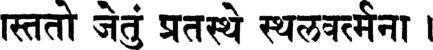

In [ ]:
im=Image.open('/content/drive/MyDrive/data/ocr/NirnaySagar_page-84_000003.jpg')
tessdata_dir_config = r'--tessdata-dir "/content/drive/MyDrive/data/ocr/tessdata/"'
print(pytesseract.image_to_string(im, lang='san', config='--oem 1 --psm 7 --tessdata-dir "/content/drive/MyDrive/data/ocr/tessdata/"'))
im


In [ ]:
from difflib import SequenceMatcher
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

similar('स्ततो','स्तितो')


ModuleNotFoundError: ignored

  Using cached google_api_python_client-1.12.8-py2.py3-none-any.whl (61 kB)
  Using cached google_api_python_client-1.12.7-py2.py3-none-any.whl (61 kB)
  Using cached google_cloud_vision-2.1.0-py2.py3-none-any.whl (458 kB)
     |████████████████████████████████| 450 kB 7.7 MB/s 


In [ ]:
!pip install colab-env -qU
import colab_env
!echo $GOOGLE_APPLICATION_CREDENTIALS

/content/drive/MyDrive/data/ocr/sanskritocr-302909-00f90da33203.json


In [ ]:
#calculating CER
import sys

def levenshtein(u, v):
    prev = None
    curr = [0] + [*range(1, len(v) + 1)]
    # Operations: (SUB, DEL, INS)
    prev_ops = None
    curr_ops = [(0, 0, i) for i in range(len(v) + 1)]
    for x in range(1, len(u) + 1):
        prev, curr = curr, [x] + ([None] * len(v))
        prev_ops, curr_ops = curr_ops, [(0, x, 0)] + ([None] * len(v))
        for y in range(1, len(v) + 1):
            delcost = prev[y] + 1
            addcost = curr[y - 1] + 1
            subcost = prev[y - 1] + int(u[x - 1] != v[y - 1])
            curr[y] = min(subcost, delcost, addcost)
            if curr[y] == subcost:
                (n_s, n_d, n_i) = prev_ops[y - 1]
                curr_ops[y] = (n_s + int(u[x - 1] != v[y - 1]), n_d, n_i)
            elif curr[y] == delcost:
                (n_s, n_d, n_i) = prev_ops[y]
                curr_ops[y] = (n_s, n_d + 1, n_i)
            else:
                (n_s, n_d, n_i) = curr_ops[y - 1]
                curr_ops[y] = (n_s, n_d, n_i + 1)
    return curr[len(v)], curr_ops[len(v)]


def calculateCER(ref,hyp):
  wer_s, wer_i, wer_d, wer_n = 0, 0, 0, 0
  cer_s, cer_i, cer_d, cer_n = 0, 0, 0, 0
  sen_err = 0
  for n in range(len(ref)):
    # update CER statistics
    _, (s, i, d) = levenshtein(ref[n], hyp[n])
    cer_s += s
    cer_i += i
    cer_d += d
    cer_n += len(ref[n])
     
    # update WER statistics
    '''_, (s, i, d) = levenshtein(ref[n].split(), hyp[n].split())
    wer_s += s
    wer_i += i
    wer_d += d
    wer_n += len(ref[n].split())'''
    
    # update SER statistics
    if s + i + d > 0:
      sen_err += 1

  if cer_n > 0:
    print("CER S:"+str(cer_s)+" CER I:"+str(cer_i)+" CER D:"+str(cer_d)+" CER_N:"+str(cer_n))
    return (100.0 * (cer_s + cer_i + cer_d)) / cer_n
  else:
    return 0

print(calculateCER(['तोत'],['तोस्']))

CER S:1 CER I:0 CER D:1 CER_N:3
66.66666666666667


In [ ]:
[(0, 0, i) for i in range(10)]

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 0, 9)]

In [ ]:
import csv
import os
try:
 from PIL import Image
except ImportError:
 import Image
import cv2
import pytesseract
from difflib import SequenceMatcher



csvreader=csv.reader(open('/content/drive/MyDrive/data/ocr/Train.txt'),delimiter='\t')
filenames=[]
sanword=[]
groundtruth=""
predictedwords=""
groundfile=open('/content/drive/MyDrive/data/ocr/groundtruth.txt','w')
predictedfile=open('/content/drive/MyDrive/data/ocr/predictedcontent.txt','w')

for row in csvreader:
  filenames.append(row[0].replace('images/',''))
  sanword.append(row[1])

print(filenames)

for imgfile in os.listdir('/content/drive/MyDrive/data/ocr/images_subset/'):
  
  if(imgfile in filenames):
    itemnum=filenames.index(imgfile)
    im=Image.open('/content/drive/MyDrive/data/ocr/images_subset/'+imgfile)
    ocredword=pytesseract.image_to_string(im, lang='san', config='--oem 1 --psm 7 --tessdata-dir "/content/drive/MyDrive/data/ocr/tessdata/"')
    actualword=sanword[itemnum]
    groundtruth+=actualword
    predictedwords+=ocredword.strip()
    wordration=SequenceMatcher(None, ocredword, actualword).ratio()
    print('file name: '+imgfile)
    print('Actual word:'+actualword)
    print('tesseract detected word:'+ocredword.strip())
    print('word ratio:'+ str(wordration))
    print('CER: '+str(calculateCER([actualword],[ocredword])))
    print('---------------------------------------------------')
    
   # input('press any key to continue')
    im.show()
    
  
groundfile.write(groundtruth)
predictedfile.write(predictedwords)
groundfile.close()
predictedfile.close()


    



['xaeg_010010.jpg', '7SiddhantaShiromani48To200_page-080_000023.jpg', '7SiddhantaShiromani48To200_page-055_000010.jpg', 'NirnaySagar_page-100_000023.jpg', '7GanakaTarangini_page-104_000016.jpg', 'xaby_01000a.jpg', '7SiddhantaShiromani48To200_page-117_000008.jpg', '4SidhanthaShekhara2Pg43To241_page-058_000043.jpg', '4SidhanthaShekhara2Pg43To241_page-228_000016.jpg', '5Nrisimhapurvottaratapaniyopanisha_page-063_000026.jpg', 'NirnaySagar_page-112_000002.jpg', '5Nrisimhapurvottaratapaniyopanisha_page-008_000028.jpg', '5Nrisimhapurvottaratapaniyopanisha_page-101_000008.jpg', 'xaeu_010008.jpg', 'xaeu_01000e.jpg', '7SiddhantaShiromani48To200_page-055_000015.jpg', '7SiddhantaShiromani48To200_page-162_000002.jpg', 'xacv_01001a.jpg', 'NirnaySagar_page-126_000002.jpg', 'NirnaySagar_page-122_000022.jpg', '7GanakaTarangini_page-043_000010.jpg', '5Nrisimhapurvottaratapaniyopanisha_page-119_000031.jpg', '4SidhanthaShekhara2Pg43To241_page-058_000050.jpg', '7SiddhantaShiromani48To200_page-074_000028.jp

In [ ]:
#!pip install --upgrade pip

#!pip install --upgrade google-api-python-client

     |████████████████████████████████| 1.5MB 7.5MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 61 kB 27 kB/s 
     |████████████████████████████████| 92 kB 261 kB/s 
     |████████████████████████████████| 114 kB 14.1 MB/s 
  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.17.2
    Uninstalling google-auth-1.17.2:
      Successfully uninstalled google-auth-1.17.2
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 1.16.0
    Uninstalling google-api-core-1.16.0:
      Successfully uninstalled google-api-core-1.16.0
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.7.12
    Uninstalling google-api-python-client-1.7.12:
      Successfully uninstalled google-api-python-client-1.7.12
ERROR: pip's dependency resolver does not currently take into account 

In [ ]:

# Running Vision API
import base64
IMAGE="gs://cloud-training-demos/vision/sign2.jpg"
vservice = build('vision', 'v1', developerKey=APIKEY)
request = vservice.images().annotate(body={
        'requests': [{
                'image': {
                    'source': {
                        'gcs_image_uri': IMAGE
                    }
                },
                'features': [{
                    'type': 'TEXT_DETECTION',
                    'maxResults': 3,
                }]
            }],
        })
responses = request.execute(num_retries=3)
print(responses['responses'][0]['textAnnotations'][0]['description'])


00f90da332035e5b5e315811c7da4358d63b6604··········


In [ ]:
#all vision related code
!pip install --upgrade google-api-python-client
!pip install --upgrade google-cloud-vision

!export GOOGLE_APPLICATION_CREDENTIALS="/content/drive/MyDrive/data/ocr/sanskritocr-302909-00f90da33203.json"


#import getpass

#APIKEY= getpass.getpass('00f90da332035e5b5e315811c7da4358d63b6604')


def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

print('Google Vision API detected word:')
    detect_text('/content/drive/MyDrive/data/ocr/images_subset/'+imgfile)
    

In [ ]:
#pdf to ocrd pdf
#install required files
!pip install pdf2image

In [ ]:
#pdf to ocrd pdf
from pd2image import 